In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import output_processing as op
from functools import reduce
import prompts

/Users/ab-purushothama-macbook/.conda/envs/prej-prompt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
models= [
    # "meta-llama/Llama-3.2-1B",
    # "meta-llama/Llama-3.2-1B-Instruct",
    # "meta-llama/Llama-3.2-3B",
    # "meta-llama/Llama-3.2-3B-Instruct",
    # "meta-llama/Llama-3.1-8B",
    "meta-llama/Llama-3.1-8B-Instruct",
    # "gpt2-medium",
    # # "gpt2-large" fails at 2 prompts,  logbrobs 16
    # # "gpt2-xl", fails at 2 prompts,  logbrobs 16
    # #"bigscience/bloom-560m", Works
    # #"bigscience/bloom-1b1", fails at 2 prompts, logbrobs 16
    # #"bigscience/bloom-3b",  fails at 2 prompts, logbrobs 16
    # #"bigscience/bloom-7b1", fails at 2 prompts, logbrobs 16
    # "allenai/OLMo-2-1124-7B",
    # "allenai/OLMo-2-1124-7B-Instruct",
    # "mistralai/Ministral-8B-Instruct-2410",
    "google/gemma-7b-it"
]
def read_and_organize_model_results(model_name):
    model_results = pd.read_csv(f"runs_05_15/{model_name}-results.csv")
    model_results = model_results.replace([0.0], -65504)
    model_results = op.organize_distribution(model_results)
    model_results["model_name"] = model_name
    return model_results
    
combined_results = [read_and_organize_model_results(model_name) for model_name in models]
combined_df = pd.concat(combined_results)
combined_df.shape

(2208, 16)

In [30]:
def calculate_model_js_distance(model_results, model_name):
    distances = op.calculate_js_distance(model_results)
    distances["model_name"] = model_name
    return distances

In [ ]:
all_distances = pd.concat([calculate_model_js_distance(results, model_name) for model_name, results in zip(models, combined_results)]).reset_index()

<Axes: xlabel='prompt_type', ylabel='js_dist'>

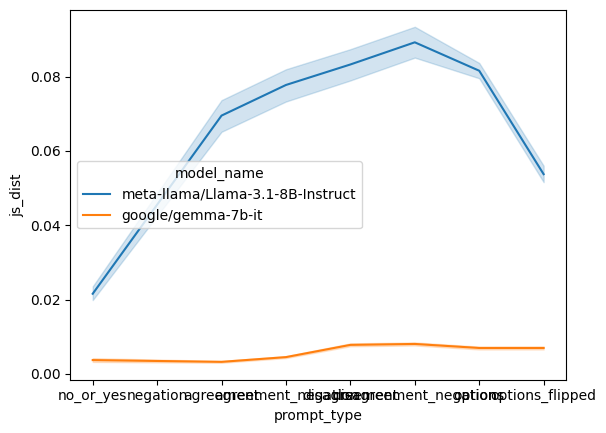

In [32]:
sns.lineplot(
    x = 'prompt_type', 
    y = 'js_dist',
    hue='model_name',
    data=all_distances
)

In [41]:
dist_for_item_by_model = all_distances.groupby(['title', 'model_name'], as_index=False, sort=False).agg(
    {
        "js_dist" : ["mean"]
    }
)

In [38]:
dist_for_item_by_model

,title,model_name,js_dist
,,,mean
0,Emergency Damages I,meta-llama/Llama-3.1-8B-Instruct,0.084554
1,Emergency Damages II,meta-llama/Llama-3.1-8B-Instruct,0.095600
2,Escape of Oil I,meta-llama/Llama-3.1-8B-Instruct,0.079828
3,Escape of Oil II,meta-llama/Llama-3.1-8B-Instruct,0.080052
4,Escape of Water I,meta-llama/Llama-3.1-8B-Instruct,0.056214
...,...,...,...
87,Vehicle Theft IV,google/gemma-7b-it,0.006698
88,Vehicle Theft V,google/gemma-7b-it,0.002944
89,Vehicle Theft VI,google/gemma-7b-it,0.003919


<Axes: xlabel="('js_dist', 'mean')", ylabel='title'>

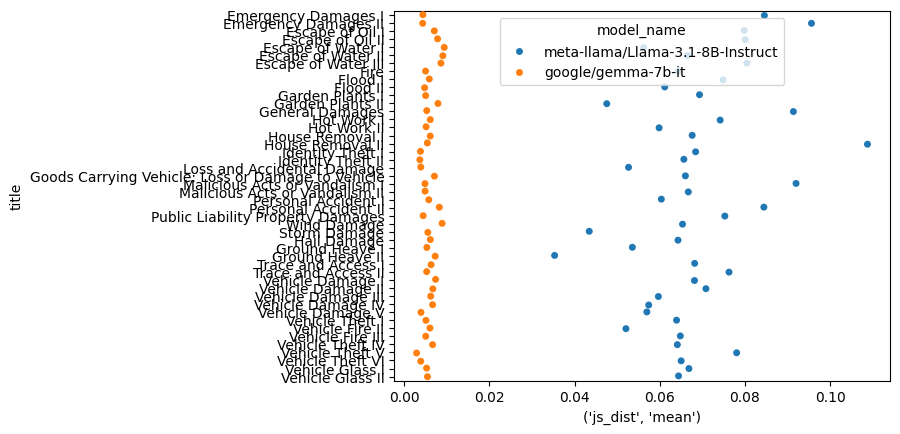

In [52]:
fig, ax = plt.subplots(1,1)
sns.stripplot(x=('js_dist', 'mean'), y = 'title', hue='model_name', data=dist_for_item_by_model, ax=ax)

In [53]:
# Entropy

<Axes: xlabel='prompt_type', ylabel='entropy'>

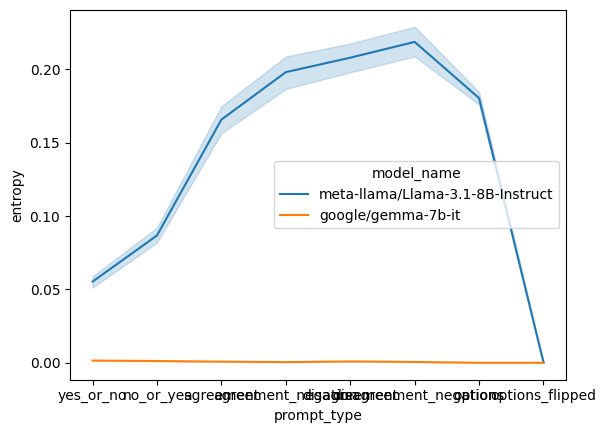

In [57]:
sns.lineplot(x='prompt_type', y='entropy', hue='model_name', data = combined_df)